In [4]:
from astropy.table import Table

import numpy as np

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from dark_matter_mass_v1 import rot_fit_BB

import matplotlib.pyplot as plt
%matplotlib notebook

# Data

In [2]:
data_filename = '../spirals/DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_morph_v6.txt'

data = Table.read(data_filename, format='ascii.commented_header')

In [28]:
################################################################################
# Calculate the velocity at R90, Rmax
#-------------------------------------------------------------------------------
# Convert r from arcsec to kpc
#-------------------------------------------------------------------------------
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458 # Speed of light in units of km/s

dist_to_galaxy_Mpc = c*data['NSA_redshift']/H_0
dist_to_galaxy_kpc = dist_to_galaxy_Mpc*1000

data['R90_kpc'] = dist_to_galaxy_kpc*np.tan(data['NSA_elpetro_th90']*(1./60)*(1./60)*(np.pi/180))
#-------------------------------------------------------------------------------

data['V90_kms'] = rot_fit_BB(data['R90_kpc'], 
                             [data['Vmax_map'], 
                              data['Rturn_map'], 
                              data['alpha_map']])
'''
data['VRmax_kms'] = rot_fit_BB(data['Rmax_map'], 
                               [data['Vmax_map'], 
                                data['Rturn_map'], 
                                data['alpha_map']])
''';
################################################################################


bad_boolean = np.logical_or.reduce([np.isnan(data['M90_map']), 
                                    np.isnan(data['M90_disk_map']), 
                                    data['alpha_map'] > 99, 
                                    data['ba_map'] > 0.998, 
                                    data['V90_kms']/data['Vmax_map'] < 0.9, 
                                    (data['Tidal'] & (data['DL_merge'] > 0.97)), 
                                    data['map_frac_unmasked'] < 0.05, 
                                    #(data['map_frac_unmasked'] > 0.13) & (data['DRP_map_smoothness'] > 1.96), 
                                    #(data['map_frac_unmasked'] > 0.07) & (data['DRP_map_smoothness'] > 2.9), 
                                    #(data['map_frac_unmasked'] > -0.0638*data['DRP_map_smoothness'] + 0.255) & (data['DRP_map_smoothness'] > 1.96)
                                   ])

good_galaxies = data[~bad_boolean]

len(good_galaxies)

2103

## Calculate mass ratios

In [23]:
good_galaxies['M90_Mdisk_ratio'] = 10**(good_galaxies['M90_map'] - good_galaxies['M90_disk_map'])
#goodHI_galaxies['M90_Mdisk_ratio'] = 10**(goodHI_galaxies['M90_map'] - goodHI_galaxies['M90_disk_map'])

#goodHI_galaxies['M90_MdiskHI_ratio'] = 10**goodHI_galaxies['M90_map']/(10**goodHI_galaxies['M90_disk_map'] + 10**goodHI_galaxies['logHI'])

#goodHI_galaxies['M90_vis'] = np.log10(10**goodHI_galaxies['M90_disk_map'] + 10**goodHI_galaxies['logHI'])

# Distribution in $M_{90}/M_{90,disk}$

<IPython.core.display.Javascript object>


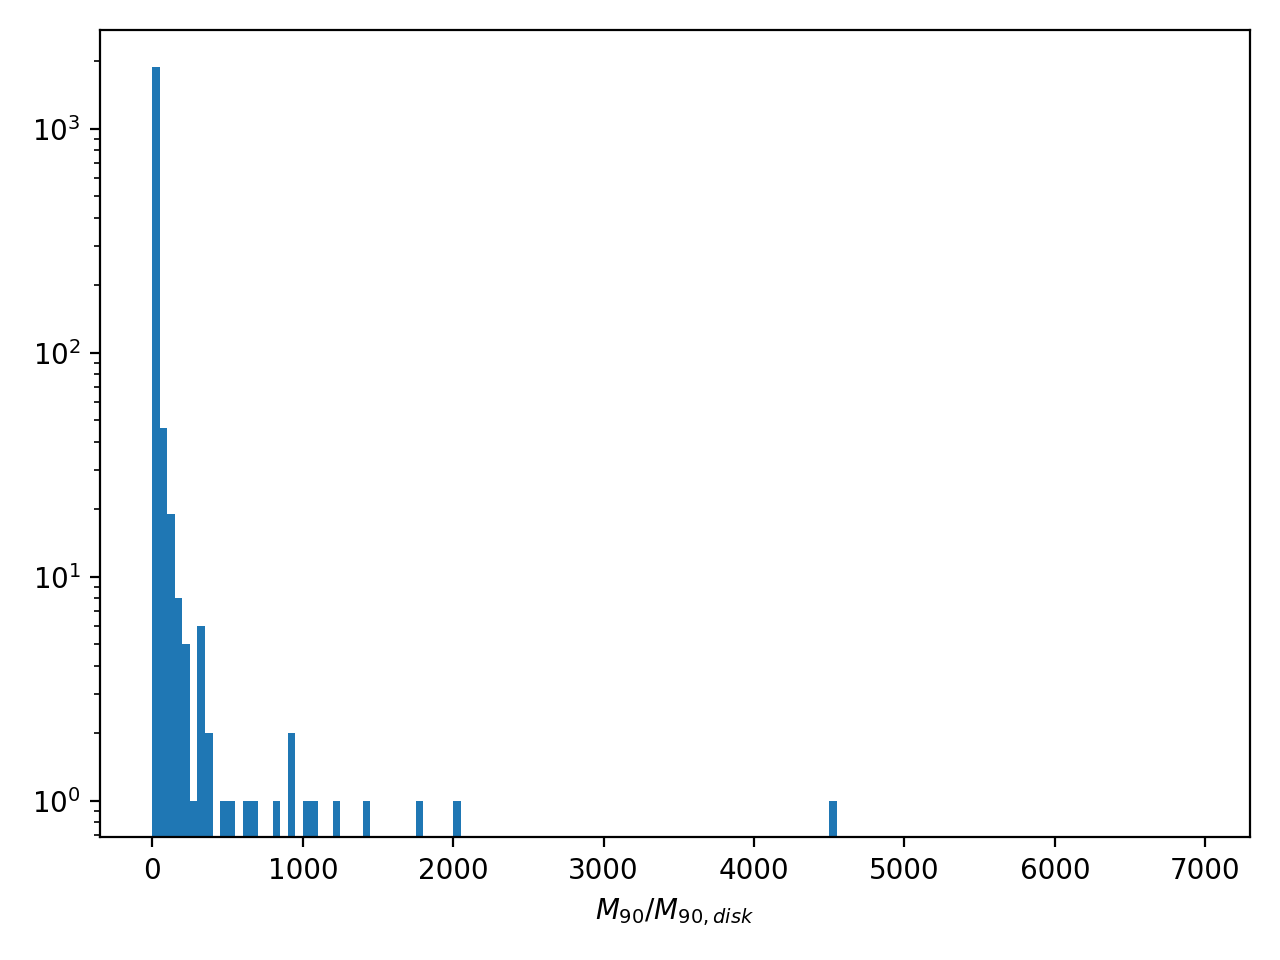

In [26]:
plt.figure()

plt.hist(good_galaxies['M90_Mdisk_ratio'], bins=np.arange(0,7000,50))

plt.yscale('log')

plt.xlabel('$M_{90}/M_{90,disk}$')

plt.tight_layout();

In [27]:
good_galaxies[(good_galaxies['M90_Mdisk_ratio'] > 1000) & (good_galaxies['M90_Mdisk_ratio'] < 7000)]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,ba_map,ba_err_map,phi_map,phi_err_map,Vsys_map,Vsys_err_map,x0_map,x0_err_map,y0_map,y0_err_map,Vmax_map,Vmax_err_map,alpha_map,alpha_err_map,Rturn_map,Rturn_err_map,M90_map,M90_err_map,Sigma_disk_map,Sigma_disk_err_map,Rdisk_map,Rdisk_err_map,M90_disk_map,M90_disk_err_map,DRP_map_smoothness,NSA_elpetro_th90,chi2_map,chi2_disk_map,logHI,WF50,WP20,CMD_class,map_fit_flag,Hubble_type,Tidal,GZ_edge_on,GZ_bar,GZ_spiral,mangaid,DL_ttype,DL_s0,DL_edge_on,DL_bar_GZ2,DL_bar_N10,DL_merge,map_frac_unmasked,SFR,sSFR,Rmax_map,R90_kpc,V90_kms,M90_Mdisk_ratio
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str6,int64,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8984,12702,2245,523,54208,484403,203.5956974360575,27.461341240864517,0.8541006445884705,176.71435546875,0.03912948817014694,2755893248.0,0.0,6270.113135746928,219570.35150995487,0.2998250295943175,1.3132500307669255,54.48594118956852,74.26516866971107,2.550607970181947,100.0,1698.4498319444342,14.79892182940494,248.32492779316735,114.26290672209709,24.124815020256623,29.065342943070554,261.6268179480834,0.02821422927081585,0.00107269142092135,46787723197639.305,3276877659603143.0,46787665768281.05,3276877659603143.0,57429358.25527865,814699.4357886723,57059276.982290626,-18.95944595336914,100.0,3658.7994760918787,2.5421069908550957,0.46971903345467814,10.343012950422965,4.758807357240526,-99.0,-99.0,1.0,0,0,9.08099019826142,2.4664869715674897,43.6044696580139,2244838,8.773849279214623,1.1687104403972626,0.49850478468899523,5.118494563877424,814700.4357886724,57059276.982290626,1.3273516696481813,83.35641282653955,126.04193133181982,-10.342641710151858,0.9853770333906162,0.9735262474099158,127.34960599089678,3.1511173936194026,0.7234786142340797,2.9466811617650186,37.831626426463366,1.2956374121808154,36.34920268434245,1.445160450321636,215.52650035056567,282.17900194938034,3.18732409673563,5.135255784957463,1.7583134451277065,0.8767566321931657,10.81831583401496,10.740796434948013,1.3616410184910135,0.07659218600970442,3.9868366928915666,0.3629858357323434,7.793836551272377,6.025109768158977,0.7368250096097906,10.83756160736084,9.81209475842806,62300836.19617437,9.75,1426.234054854027,1250.0522010191178,1,-3.0,Sc,0,0.0,0.03333333333333333,0.43333333333333335,1-458124,4.643827438354492,0.9965447783470154,0.0001451623102184385,0.03058421052992344,0.33175864815711975,0.5004141926765442,0.2733747260774288,-0.14884735643863678,-9.604958534240723,9.0728633883